#Import library yang di butuhkan

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Import Dataset Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"inizar","key":"51be1fbce52846ee2755959cc793a751"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 7.84MB/s]


In [8]:
!mkdir iris
!unzip iris.zip -d iris
!ls iris

mkdir: cannot create directory ‘iris’: File exists
Archive:  iris.zip
  inflating: iris/Iris.csv           
  inflating: iris/database.sqlite    
database.sqlite  Iris.csv


#Data Discovery

In [26]:
df = pd.read_csv("/content/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
df.drop('Id', axis=1, inplace=True)

In [29]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#EDA

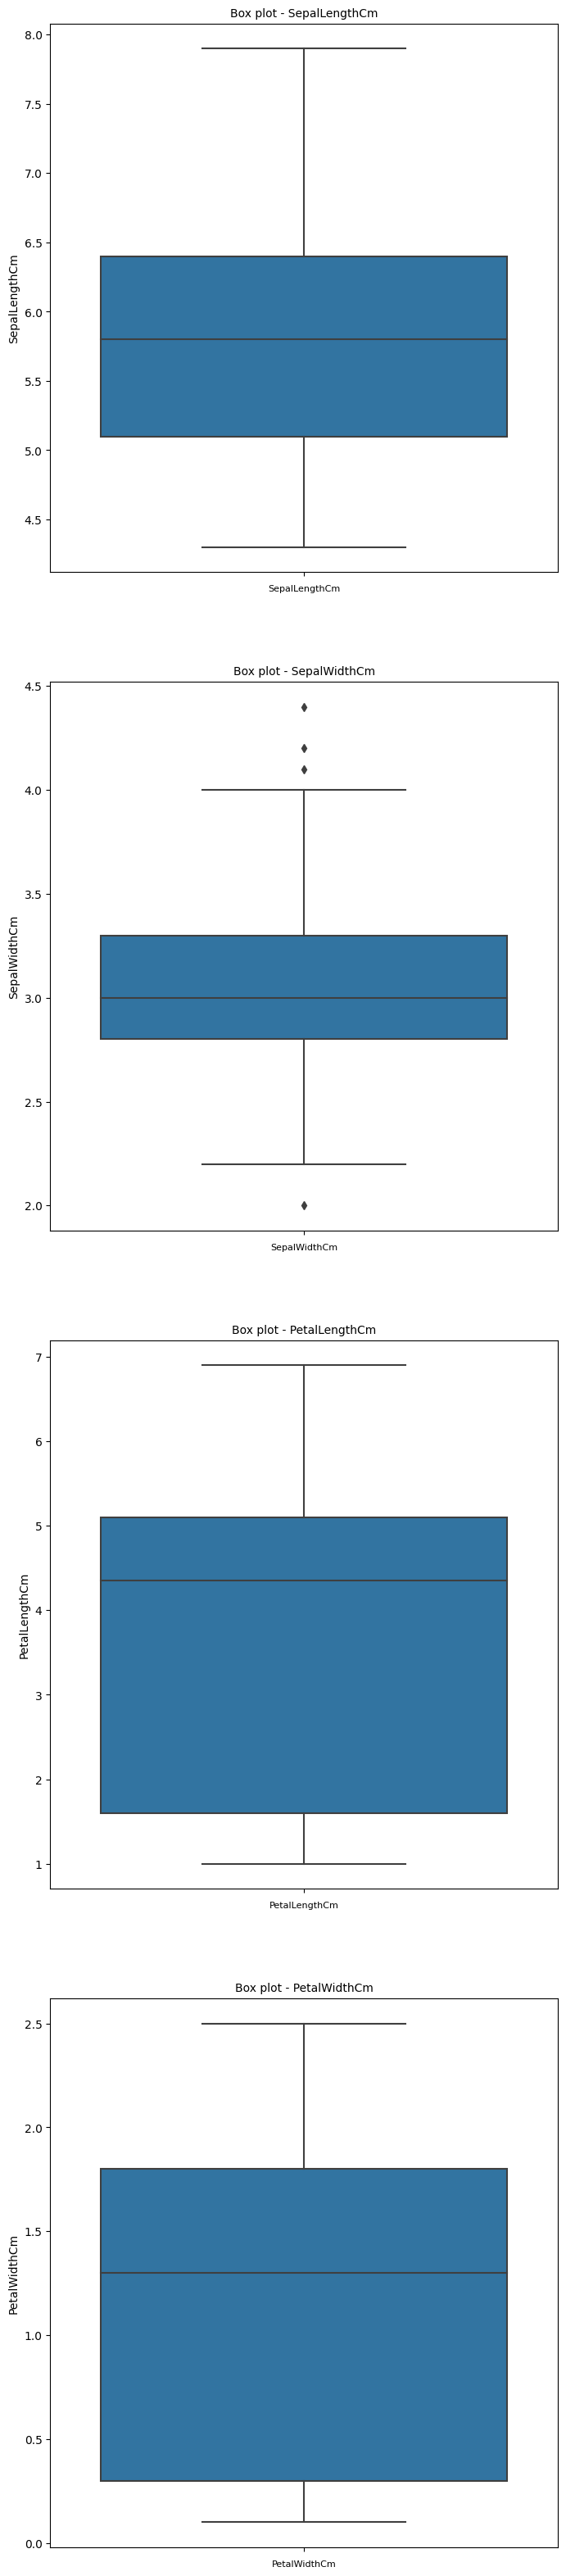

In [30]:
col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


<ipython-input-31-818641ddc473>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_val], hist=True, ax=ax[i])
<ipython-input-31-818641ddc473>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_val], hist=True, ax=ax[i])
<ipython-input-31-818641ddc473>:5: UserWarning: 

`distplot` is a 

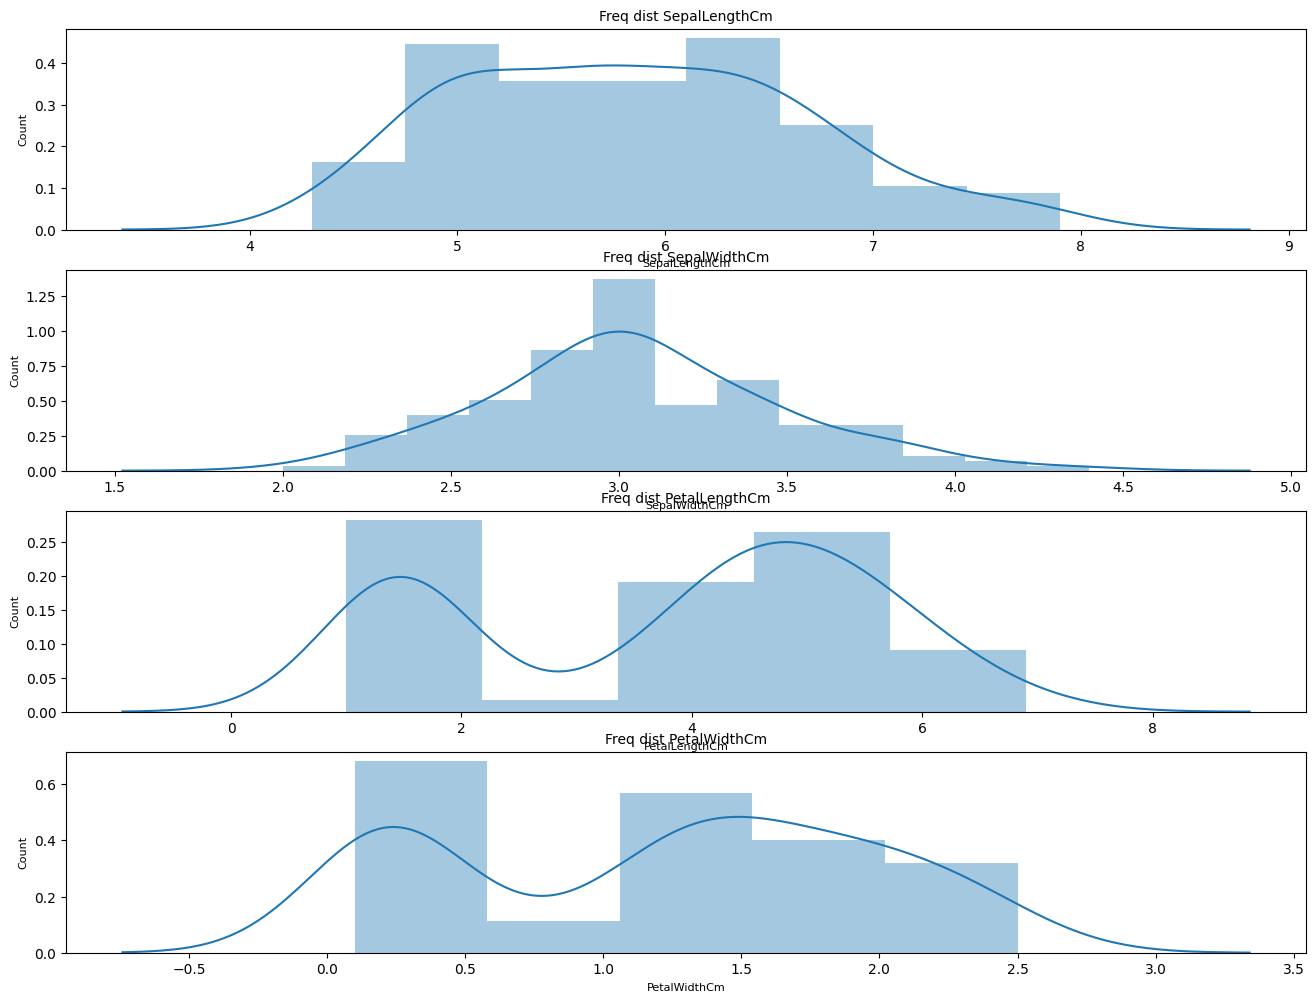

In [31]:
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

<ipython-input-32-9394223137d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

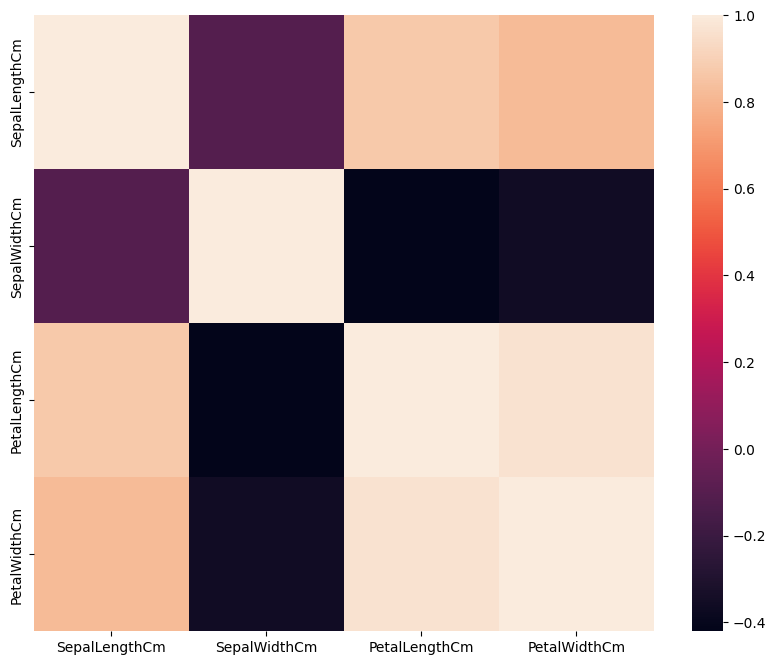

In [32]:
f,ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

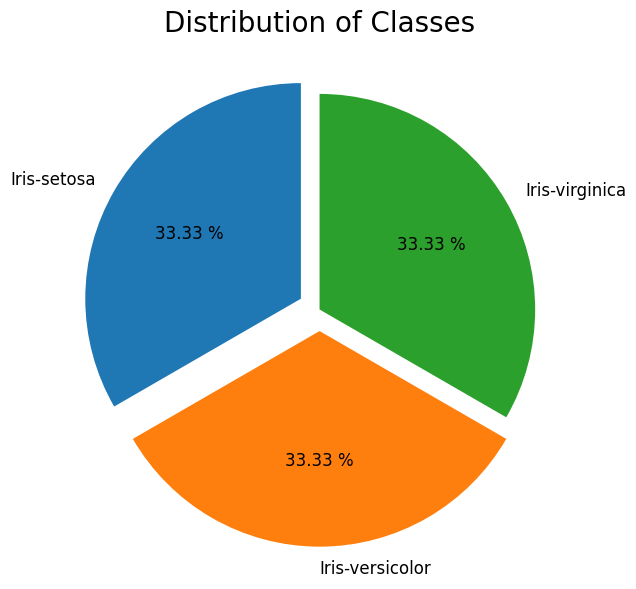

In [33]:
count_list = [(df.Species == 'Iris-setosa').sum(), (df.Species == 'Iris-versicolor').sum(), (df.Species == 'Iris-virginica').sum()]
label_list = list(df['Species'].unique())
plt.figure(figsize = (10,7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

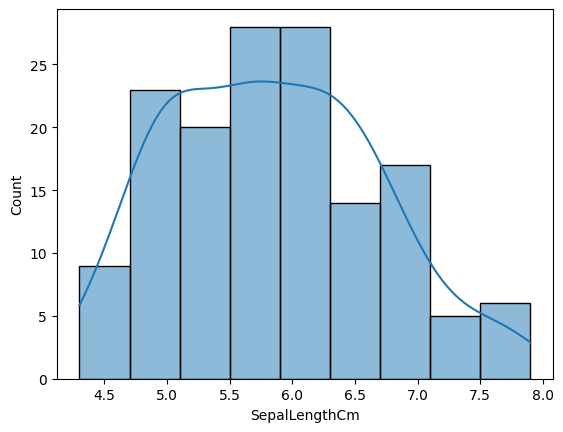

In [60]:
sns.histplot(df['SepalLengthCm'], kde=True)
plt.show()

#Data Preparation

In [34]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
x= df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df[['Species']]

In [36]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=123)

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(x_train, y_train)

#Modeling

In [40]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)
acc_score= round(accuracy_score(y_pred, y_test), 3)
print('accuracy: ', acc_score)

accuracy:  0.867


In [41]:
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

2


In [42]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(x_train, y_train)
y_predsvm = svm.predict(x_test)
acc_svm= accuracy_score(y_predsvm, y_test)
print('The accuracy for SVM is : ', acc_svm*100, '%')

The accuracy for SVM is :  93.33333333333333 %


#Visualisasi

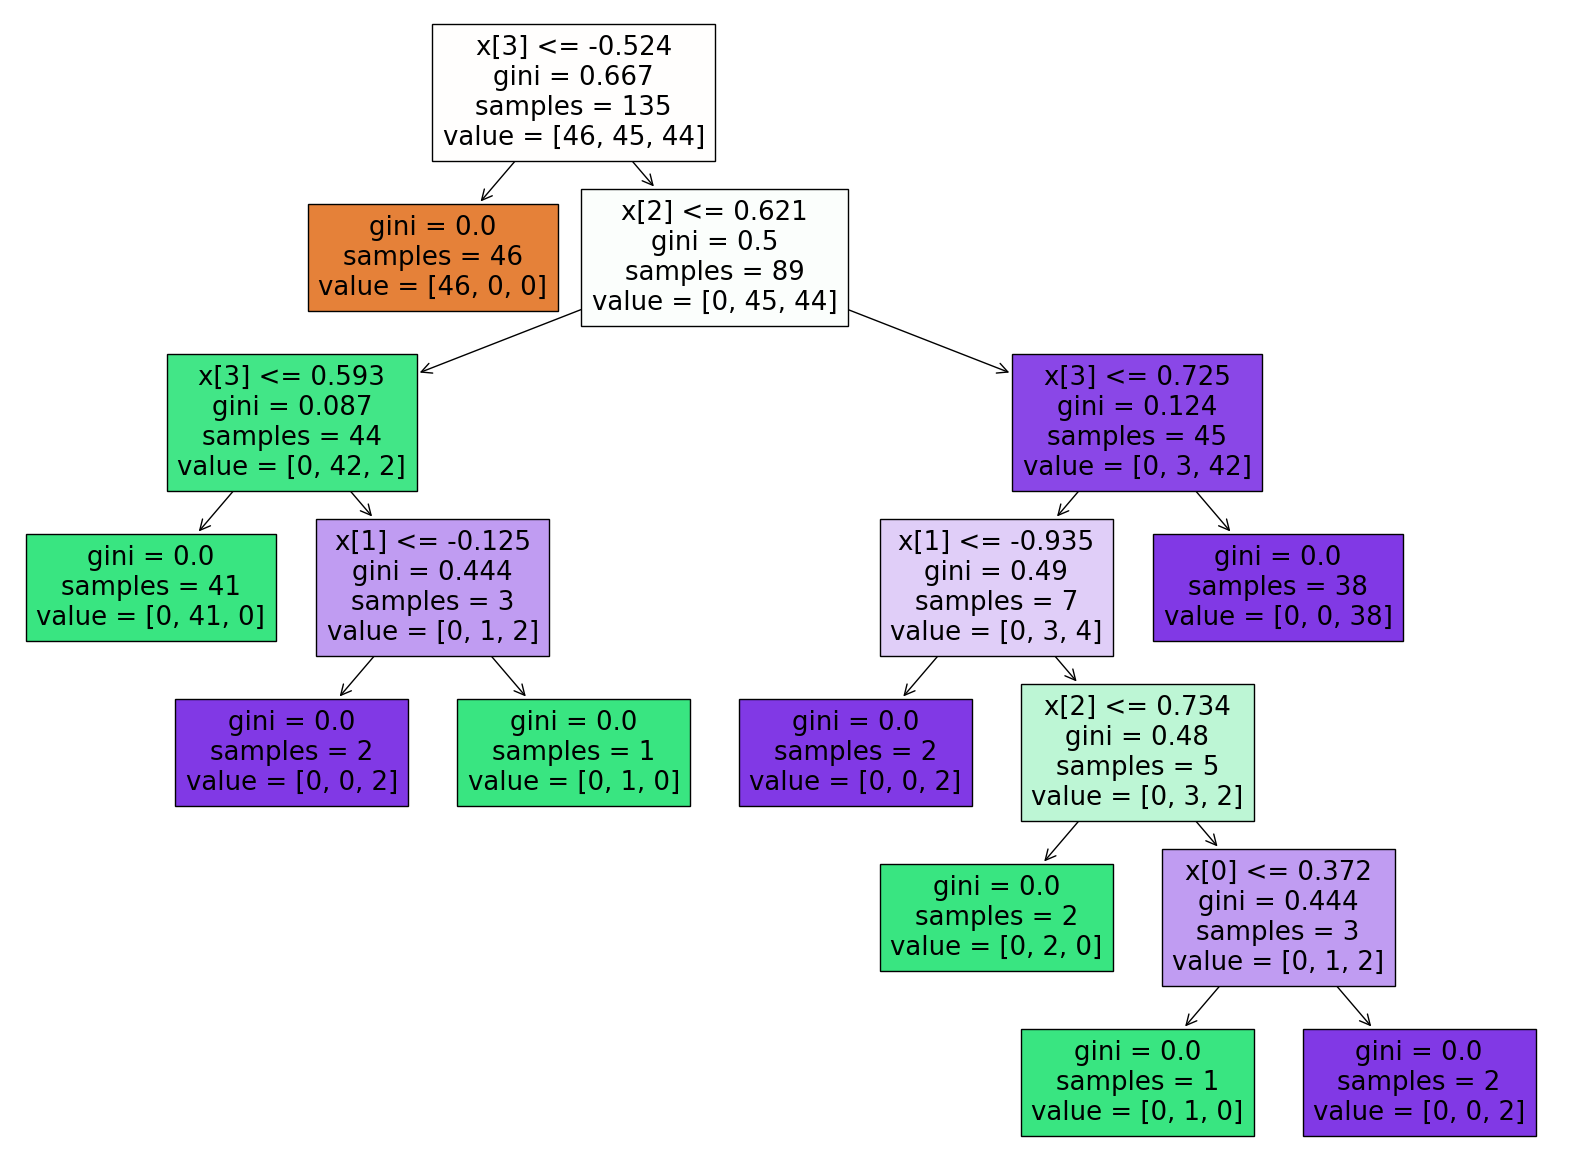

In [57]:
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True)
plt.show()

#Saving Pickle

In [46]:
import pickle

filename = 'iris.sav'
pickle.dump(tree_model,open(filename,'wb'))